# Approssimazione di un set di dati tramite Minimi Quadrati

Sia ${(x_i, y_i)}^m_{i = 0}$ un set di dati, che devono essere approssimati da un polinomio

$$p(x) = α_0 + α_1 x + · · · + α_n x^n$$

di grado $n \in \mathbb{N}$ fissato.

Si definisce una matrice

$$A = \begin{bmatrix}
1 & x_0 & x_0^2 & \dots & x_0^n\\
1 & x_1 & x_1^2 & \dots & x_1^n\\
\vdots & \vdots & \vdots & \vdots & \vdots\\
1 & x_m & x_m^2 & \dots & x_m^n
\end{bmatrix}$$

E i vettori

$$\alpha = \begin{bmatrix} \alpha_0\\ \vdots \\ \alpha_n \end{bmatrix} \qquad y = \begin{bmatrix} y_0\\ \vdots \\ y_n \end{bmatrix}$$


Reimpostando il problema con la formulazione ai minimi quadrati e risolvendo quindi il problema

$$min_\alpha ||A \alpha - y||^2_2$$

si ottengono i coefficienti $\alpha$ che definiscono in modo univoco il polinomio
$p(x)$.


## A.1) Risoluzione tramite equazioni normali
Quando $A$ è di rango massimo, il problema ai minimi quadrati

$$min_\alpha ||A \alpha - y||^2_2$$

può essere risolto col metodo delle equazioni normali, ossia osservando che il
problema di minimo può essere riscritto come:

$$A^T A \alpha = A^T y$$

Risolvendo questo sistema lineare (si ottiene il vettore degli $\alpha$ che corrisponde ai
coefficienti del polinomio approssimante).

## A.2) Risoluzione tramite SVD
Consideriamo la decomposizione SVD della matrice $A$

$$A = U S V^T$$

Con $U \in \mathbb{R}^{\mathbb{N} \times \mathbb{N}}$ e $V^T \in \mathbb{R}^{n \times n}$ matrici unitarie e $S \in \mathbb{R}^{\mathbb{N} \times n}$ diagonale.
La soluzione di minima norma del problema di minimi quadrati è data da:

$$\alpha_i = \sum_{j = 0}^{m}{\frac{(u_i^T y) v_i}{s_i}}, \qquad i = 0, \dots, n$$

# Esercizio 1
1. Calcolare il polinomio di grado $n = 5$ che approssimi i seguenti dati:

$$\{(1.0, 1.18), (1.2, 1.26), (1.4, 1.23), (1.6, 1.37), (1.8, 1.37), (2.0, 1.45), (2.2, 1.42), (2.4, 1.46), (2.6, 1.53), (2.8, 1.59), (3.0, 1.50)\}$$

2. Risolvere il problema ai minimi quadrati sia con le equazioni normali che con la SVD (vedi A.1 e A.2).
3. Valutare graficamente i polinomi di approssimazione e confrontare gli errori commessi dai due metodi sul set di punti.

Shape of x: (11,) 	Shape of y: (11,)
alpha_normali = [  8.43398601 -22.0317191   25.44762528 -13.98346444   3.70592949
  -0.38060897]
Shape of U: (11, 11) 	Shape of S: (6,) 	Shape of V: (6, 6)
Alpha SVD = [  8.43398601 -22.03171911  25.44762529 -13.98346445   3.70592949
  -0.38060897]
Errore di approssimazione con Eq. Normali:  0.0925676216004488
Errore di approssimazione con SVD:  0.09256762160045413


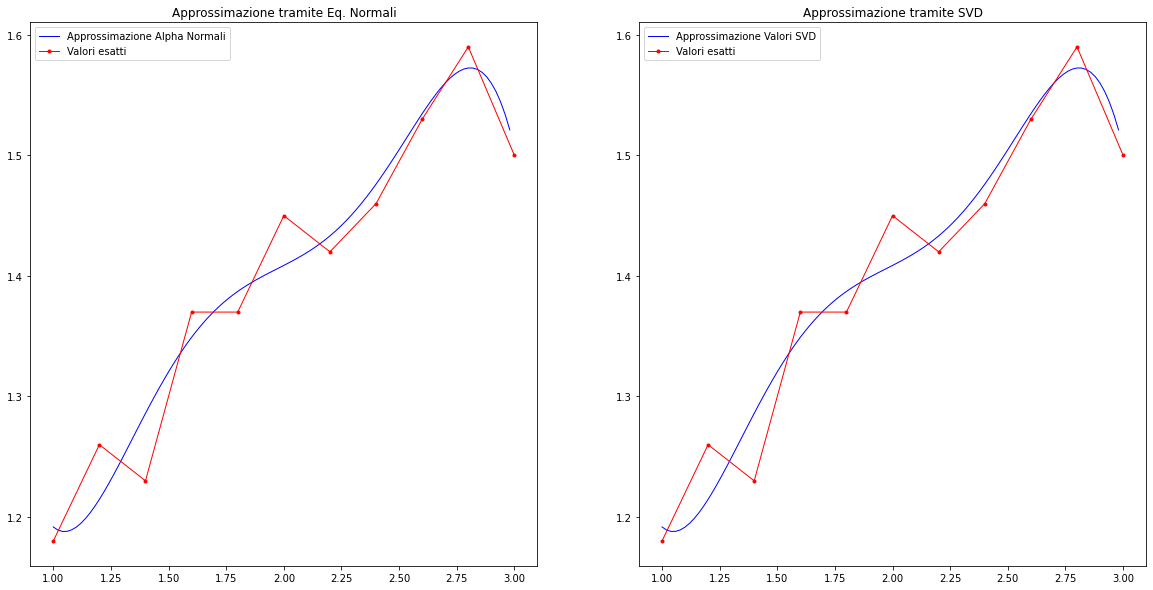

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.linalg as la


n = 5 # Grado del polinomio approssimante

x = np.array([1, 1.2, 1.4, 1.6, 1.8, 2, 2.2, 2.4, 2.6, 2.8, 3])
y = np.array([1.18, 1.26, 1.23, 1.37, 1.37, 1.45, 1.42, 1.46, 1.53, 1.59, 1.5])

print('Shape of x:', x.shape, '\tShape of y:', y.shape)

N = x.size # Numero dei dati

A = np.zeros((N, n+1))

for i in range(n+1):
  A[:, i] = x**i

#print("A = \n", A)


''' Risoluzione tramite equazioni normali'''

# calcoliamo la matrice del sistema e il termine noto a parte
ATA = A.T @ A
ATy = A.T @ y

# A.T A alpha = A.T y -> L L.T alpha = A.T y
#
# L z = A.T y
# L.T alpha = z

L = la.cholesky(ATA, lower = True)
z = la.solve(L, ATy, lower = True)

alpha_normali = la.solve(L.T, z)

print("alpha_normali =", alpha_normali)


'''Risoluzione tramite SVD'''

# help(scipy.linalg.svd)

(U, S, Vt) = la.svd(A)

print('Shape of U:', np.shape(U), '\tShape of S:', np.shape(S), '\tShape of V:', np.shape(Vt))

alpha_svd = np.zeros(S.shape)

for j in range(n+1):
    uj = U[ : ,j].T # prendo la j colonna di U, poi la traspongo (usando np.dot non è essenziale, moltiplica comunque due vettori tra loro anche se sono due vettori colonna)
    vj = Vt[j, : ] # prendo la j riga di V (ovvero a j colonna di V.T) 
    alpha_svd = alpha_svd + (np.dot(uj, y) * vj) / S[j]

print('Alpha SVD =', alpha_svd)


'''Verifica e confronto delle soluzioni'''

# Funzione per valutare il polinomio p, in un punto x, dati i coefficienti alpha
def p(alpha, x):
    #A = np.zeros((x.size, alpha.size))
    #for i in range(alpha.size):
    #    A[ : ,i] = x**i
    #
    #return A @ alpha
    return [sum([alpha[i] * x[j]**i for i in range(alpha.size)]) for j in range(x.size)]


'''CONFRONTO ERRORI SUI DATI '''
y1 = p(alpha_normali, x)
y2 = p(alpha_svd, x)

err1 = np.linalg.norm(y-y1, 2) 
err2 = np.linalg.norm(y-y2, 2) 
print ('Errore di approssimazione con Eq. Normali: ', err1)
print ('Errore di approssimazione con SVD: ', err2)


'''CONFRONTO GRAFICO '''

x_plot = np.arange(start=min(x), stop=max(x), step = (max(x) - min(x))/100)

y_normali = p(alpha_normali, x_plot)
y_svd = p(alpha_svd, x_plot)


plt.figure(figsize=(20, 10))

plt.subplot(1, 2, 1)
plt.plot(x_plot, y_normali, label='Approssimazione Alpha Normali', color='blue', linewidth=1)
plt.plot(x, y, label='Valori esatti', color='red', linewidth=1, marker='.')
plt.legend(loc='upper left')
plt.title('Approssimazione tramite Eq. Normali')

plt.subplot(1, 2, 2)
plt.plot(x_plot, y_svd, label='Approssimazione Valori SVD', color='blue', linewidth=1)
plt.plot(x, y, label='Valori esatti', color='red', linewidth=1, marker='.')
plt.legend(loc='upper left')
plt.title('Approssimazione tramite SVD')

plt.show()

# Esercizio 2
Ripetere l’esercizio precedente su un dataset scaricabile al seguente indirizzo:

https://www.kaggle.com/sakshamjn/heightvsweight-for-linear-polynomial-regression

contenente i dati riguardanti il peso e l’altezza di 71 individui.
Una volta scaricato, per caricarlo su Spyder utilizzare la libreria `pandas`, nello
specifico la funzione `pandas.read.csv` che fornisce come output il dataset.
Questo dovrà essere poi convertito in un numpy array.

(71, 2)
alpha_normali = 
 [ 1.44106455e+02 -1.20997113e+00  8.37510377e-02 -2.06367643e-03
  2.47181148e-05 -9.99497243e-08]
Shape of U: (71, 71)
Shape of S: (6,)
Shape of V: (6, 6)
Alpha SVD =
 [ 1.44106455e+02 -1.20997116e+00  8.37510386e-02 -2.06367644e-03
  2.47181149e-05 -9.99497225e-08]


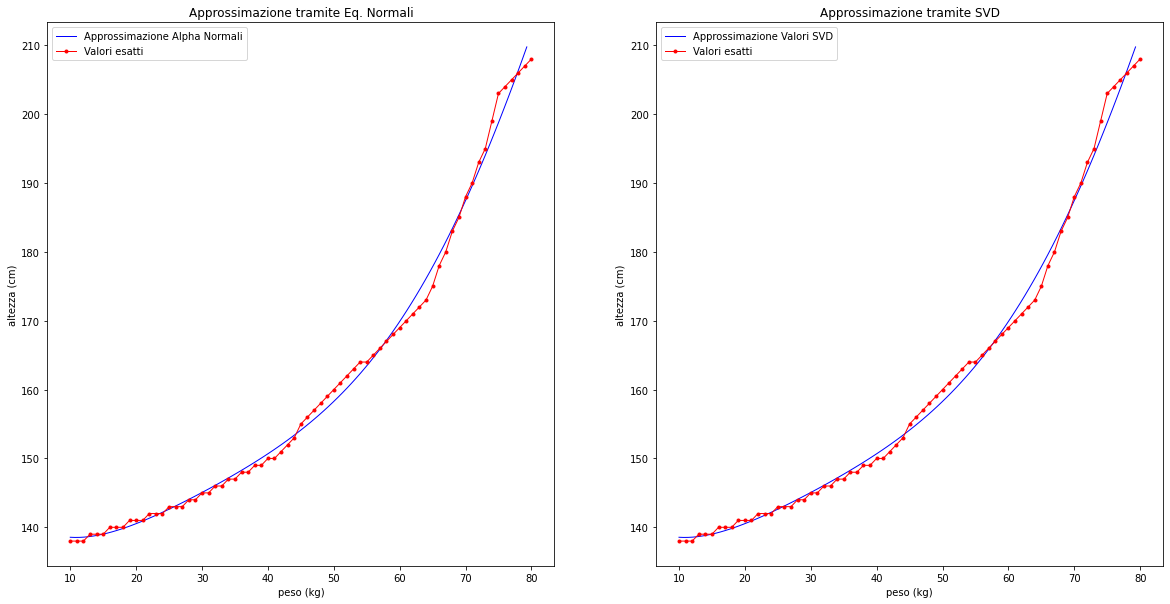

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.linalg as la



data = pd.read_csv("https://raw.githubusercontent.com/Cobbleston/calcolonumerico-02023/main/LAB/HeightVsWeight.csv")
data = np.array(data)
print(data.shape)

x = data[:, 0]
y = data[:, 1]

#print(x.shape)
#print(y.shape)

n = 5 # Grado del polinomio approssimante
N = x.size # Numero dei dati

A = np.zeros((N, n+1))

for i in range(n+1):
  A[:, i] = x**i

#print("A = \n", A)


''' RISOLUZIONE CON EQUAZIONI NORMALI'''

# calcoliamo la matrice del sistema e il termine noto a parte
ATA = A.T @ A
ATy = A.T @ y

# A.T A alpha = A.T y -> L L.T alpha = A.T y
#
# L z = A.T y
# L.T alpha = z

L = la.cholesky(ATA, lower = True)
z = la.solve(L, ATy, lower = True)

alpha_normali = la.solve(L.T, z)

print("alpha_normali = \n", alpha_normali)

''' RISOLUZIONE CON SVD '''

# help(scipy.linalg.svd)

(U, S, Vt) = la.svd(A)

print('Shape of U:', np.shape(U))
print('Shape of S:', np.shape(S))
print('Shape of V:', np.shape(Vt))

alpha_svd = np.zeros(S.shape)

for j in range(n+1):
    uj = U[ : ,j].T # prendo la j colonna di U, poi la traspongo (usando np.dot non è essenziale, moltiplica comunque due vettori tra loro anche se sono due vettori colonna)
    vj = Vt[j, : ] # prendo la j riga di V (ovvero a j colonna di V.T) 
    alpha_svd = alpha_svd + (np.dot(uj, y) * vj) / S[j]

print('Alpha SVD =\n', alpha_svd)
  

''' VISUALIZZAZIONE DEI RISULTATI '''

def p(alpha, x):
  return [sum([alpha[i] * x[j]**i for i in range(alpha.size)]) for j in range(x.size)]

x_plot = np.arange(start=min(x), stop=max(x), step = (max(x) - min(x))/100)
y_normali = p(alpha_normali, x_plot)
y_svd = p(alpha_svd, x_plot)

plt.figure(figsize=(20, 10))

plt.subplot(1, 2, 1)
plt.plot(x_plot, y_normali, label='Approssimazione Alpha Normali', color='blue', linewidth=1)
plt.plot(x, y, label='Valori esatti', color='red', linewidth=1, marker='.')
plt.legend(loc='upper left')
plt.xlabel('peso (kg)')
plt.ylabel('altezza (cm)')
plt.title('Approssimazione tramite Eq. Normali')

plt.subplot(1, 2, 2)
plt.plot(x_plot, y_svd, label='Approssimazione Valori SVD', color='blue', linewidth=1)
plt.plot(x, y, label='Valori esatti', color='red', linewidth=1, marker='.')
plt.legend(loc='upper left')
plt.xlabel('peso (kg)')
plt.ylabel('altezza (cm)')
plt.title('Approssimazione tramite SVD')

plt.show()

# Esercizio 3
Per ognuna delle seguenti funzioni:
- $f (x) = x e^x \qquad x \in [−1, 1]$
- $f (x) = \frac{1}{1 + 25x} \qquad x \in [−1, 1]$
- $f (x) = sin(5x) + 3x \qquad x \in [1, 5]$

Assegnati $m$ punti equispaziati, con $m$ fissato,
1. Per ciascun valore di $n \in {1, 2, 3, 5, 7}$, creare una figura con il grafico della funzione esatta $f(x)$ insieme a quello del polinomio di approssimazione $p(x)$. Evidenziare gli $N$ punti noti.
2. Per ciascun valore di $n \in {1, 2, 3, 5, 7}$, riportare il valore dell’errore in norma 2 commesso nel punto $x = 0$.
3. Calcolare la norma 2 dell’errore di approssimazione, commesso sugli $N$ nodi, per ciascun valore di $n \in {1, 5, 7}$.

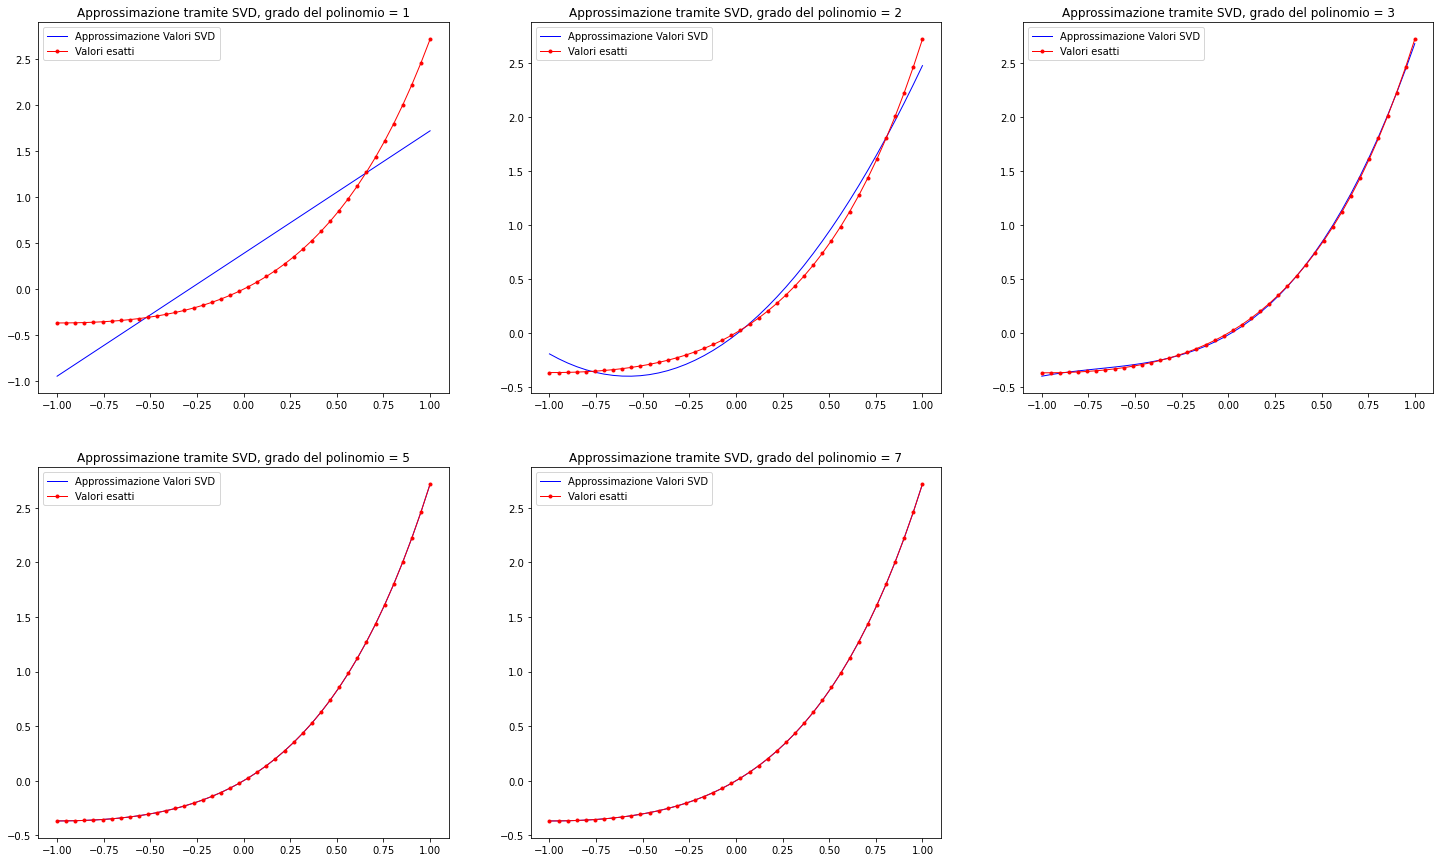

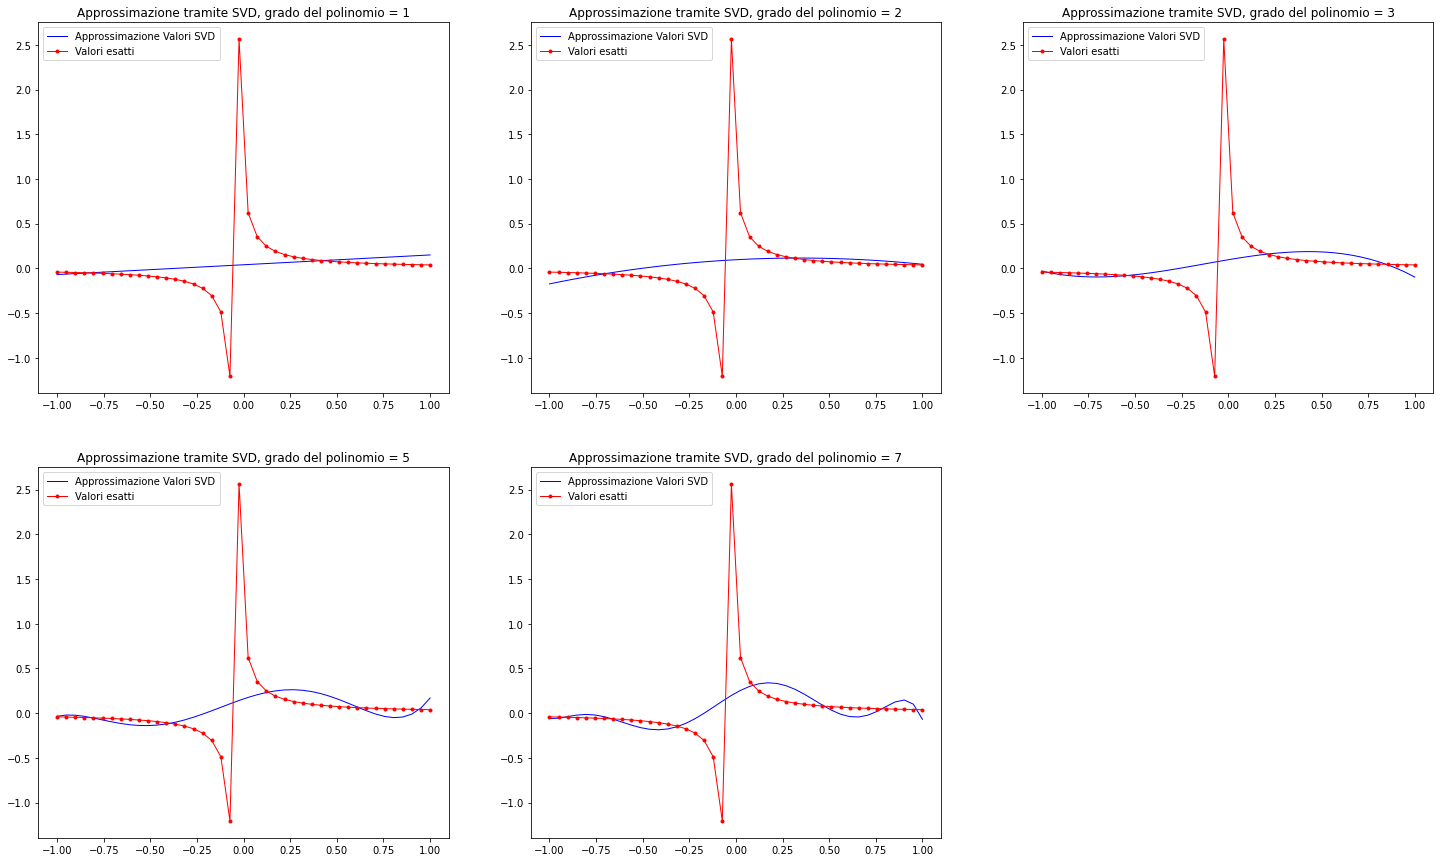

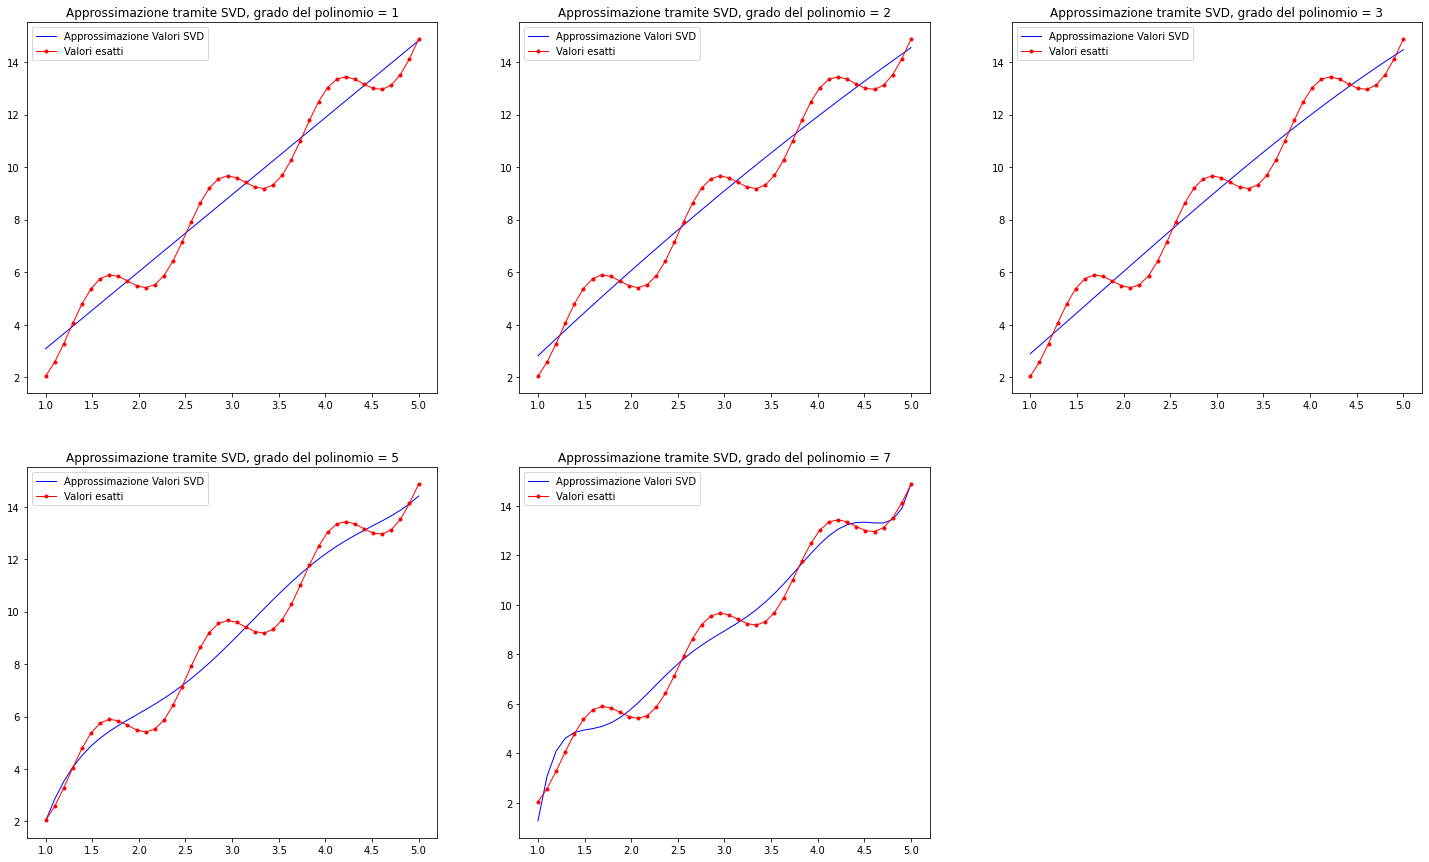

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.linalg
import math

def p(alpha, x):
    return [sum([alpha[i] * x[j]**i for i in range(alpha.size)]) for j in range(x.size)]

N = 42

f = lambda x: x * pow(math.e, x)
x = np.linspace(-1, 1, N)
y = f(x)

num = np.array([1, 2, 3, 5, 7])

plt.figure(figsize=(25, 15))
k = 1

for n in num:
    A = np.zeros((N, n+1))

    for i in range(n+1):
      A[:, i] = x**i

    (U, S, Vt) = la.svd(A)

    alpha_svd = np.zeros(S.shape)

    for j in range(n+1):
        uj = U[ : ,j].T # prendo la j colonna di U, poi la traspongo (usando np.dot non è essenziale, moltiplica comunque due vettori tra loro anche se sono due vettori colonna)
        vj = Vt[j, : ] # prendo la j riga di V (ovvero a j colonna di V.T) 
        alpha_svd = alpha_svd + (np.dot(uj, y) * vj) / S[j]

    x_plot = np.linspace(-1, 1, num=42)
    y_svd = p(alpha_svd, x_plot)

    plt.subplot(2, 3, k)
    plt.plot(x_plot, y_svd, label='Approssimazione Valori SVD', color='blue', linewidth=1)
    plt.plot(x, y, label='Valori esatti', color='red', linewidth=1, marker='.')
    plt.legend(loc='upper left')
    plt.title('Approssimazione tramite SVD, grado del polinomio = ' + str(n))
    k = k + 1

plt.show()




f = lambda x: 1 / (1 + 25 * x)
x = np.linspace(-1, 1, N)
y = f(x)

plt.figure(figsize=(25, 15))
k = 1

for n in num:
    A = np.zeros((N, n+1))

    for i in range(n+1):
      A[:, i] = x**i

    (U, S, Vt) = la.svd(A)

    alpha_svd = np.zeros(S.shape)

    for j in range(n+1):
        uj = U[ : ,j].T # prendo la j colonna di U, poi la traspongo (usando np.dot non è essenziale, moltiplica comunque due vettori tra loro anche se sono due vettori colonna)
        vj = Vt[j, : ] # prendo la j riga di V (ovvero a j colonna di V.T) 
        alpha_svd = alpha_svd + (np.dot(uj, y) * vj) / S[j]

    x_plot = np.linspace(-1, 1, num=42)
    y_svd = p(alpha_svd, x_plot)

    plt.subplot(2, 3, k)
    plt.plot(x_plot, y_svd, label='Approssimazione Valori SVD', color='blue', linewidth=1)
    plt.plot(x, y, label='Valori esatti', color='red', linewidth=1, marker='.')
    plt.legend(loc='upper left')
    plt.title('Approssimazione tramite SVD, grado del polinomio = ' + str(n))
    k = k + 1

plt.show()




#f = lambda x: math.sin(5 * x) + 3 * x
def f(x):
    return math.sin(5 * x) + 3 * x
x = np.linspace(1, 5, N)
y = np.zeros(x.size)
for i in range(0, x.size):
    y[i] = f(x[i])


plt.figure(figsize=(25, 15))
k = 1

for n in num:
    A = np.zeros((N, n+1))

    for i in range(n+1):
      A[:, i] = x**i

    (U, S, Vt) = la.svd(A)

    alpha_svd = np.zeros(S.shape)

    for j in range(n+1):
        uj = U[ : ,j].T # prendo la j colonna di U, poi la traspongo (usando np.dot non è essenziale, moltiplica comunque due vettori tra loro anche se sono due vettori colonna)
        vj = Vt[j, : ] # prendo la j riga di V (ovvero a j colonna di V.T) 
        alpha_svd = alpha_svd + (np.dot(uj, y) * vj) / S[j]

    x_plot = np.linspace(1, 5, num=42)
    y_svd = p(alpha_svd, x_plot)

    plt.subplot(2, 3, k)
    plt.plot(x_plot, y_svd, label='Approssimazione Valori SVD', color='blue', linewidth=1)
    plt.plot(x, y, label='Valori esatti', color='red', linewidth=1, marker='.')
    plt.legend(loc='upper left')
    plt.title('Approssimazione tramite SVD, grado del polinomio = ' + str(n))

    k = k + 1

plt.show()

# Esercizio 4
Utilizzando la libreria `skimage`, nello specifico il modulo data, caricare e visualizzare un’immagine $A$ in scala di grigio di dimensione $m \times n$.
1. Calcolare la matrice
    $$A_p = \sum_{i=1}^p{u_i * v_i^T * \sigma_i} \qquad \text{dove } p \leq rango(A)$$
2. Visualizzare l’immagine $A_p$.
3. Calcolare l’ errore relativo:
    $$\frac{||A - A_p||_2}{||A||_2}$$
4. Calcolare il fattore di compressione
    $$c_p = \frac{1}{p} min(m, n) - 1$$
5. Calcolare e plottare l’ errore relativo e il fattore di compressione al variare di $p$.

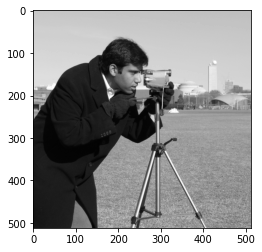

p_step: [ 10  37  64  92 119 146 174 201 228 256]
test -> 10
test -> 37
test -> 64
test -> 92
test -> 119
test -> 146
test -> 174
test -> 201
test -> 228
test -> 256
L'errore relativo della ricostruzione di A è 0.0015640529715225905
Il fattore di compressione è c = 1.0


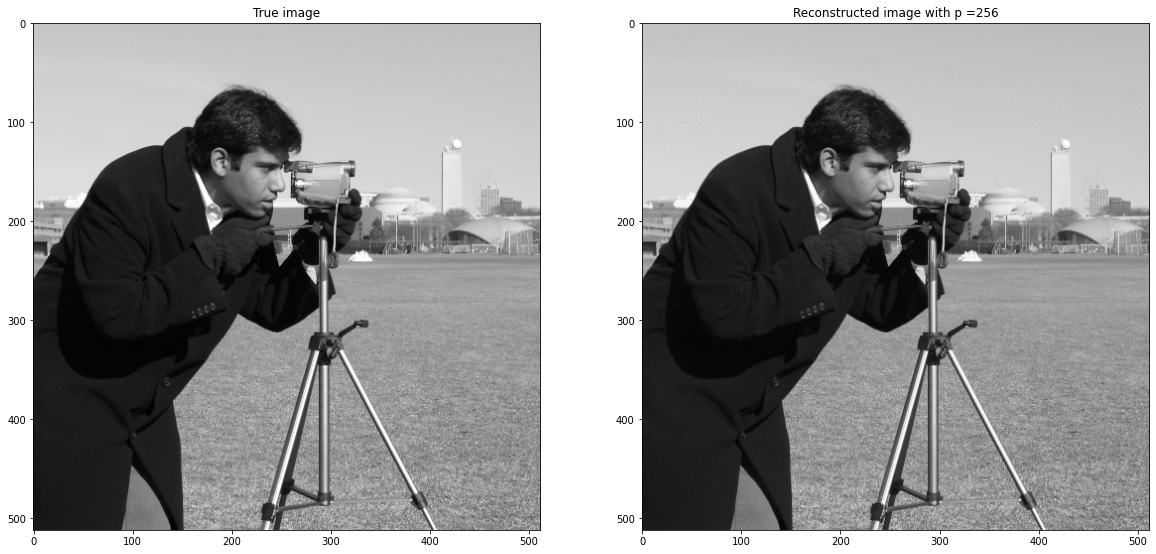

err_rel_p [0.03687658 0.0126206  0.00825438 0.00563832 0.00450901 0.00365437
 0.0029572  0.00243097 0.00195789 0.00156405]
c_p [50.2        12.83783784  7.          4.56521739  3.30252101  2.50684932
  1.94252874  1.54726368  1.24561404  1.        ]
test_p [1.00000000e+01 3.68765778e-02 3.70000000e+01 1.26205961e-02
 6.40000000e+01 8.25437541e-03 9.20000000e+01 5.63832396e-03
 1.19000000e+02 4.50901414e-03 1.46000000e+02 3.65436632e-03
 1.74000000e+02 2.95719532e-03 2.01000000e+02 2.43096733e-03
 2.28000000e+02 1.95789333e-03 2.56000000e+02 1.56405297e-03]


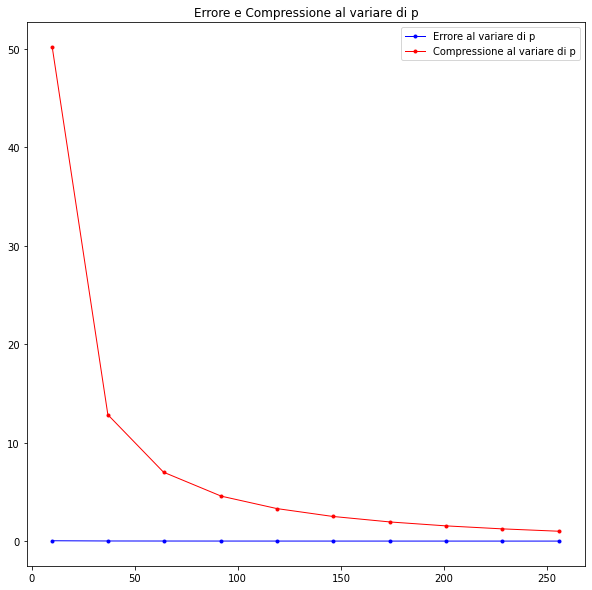

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.linalg as la
from skimage import data


A = data.camera()
# A = data.coins()

########################
# Note, per fare ui * vi.T usare np.outer(a, b)
########################

#print(type(A))
#print(A.shape)


plt.imshow(A, cmap='gray')
plt.show()



(U, S, Vt) = la.svd(A)

#(m, n) = A.shape

A_p = np.zeros(A.shape)

P_MIN = 10
P_MAX = int(min(A.shape) / 2)
#P_MAX = 512
NUM_SAMPLE = 10

p_step = np.int64(np.linspace(P_MIN, P_MAX, NUM_SAMPLE))

err_rel_p = np.array([])
c_p = np.array([])
test_p = np.array([])

print('p_step:', p_step)

for i in range(0, P_MAX+1):
    A_p = A_p + S[i] * np.outer(U[ : ,i], Vt[i, : ])
    if i in p_step:
        print('test ->', i)
        err_rel_p = np.append(err_rel_p, la.norm(A - A_p, ord = 2) / la.norm(A, ord = 2))
        c_p = np.append(c_p, 1 / i * min(A.shape) - 1)
        test_p = np.append(test_p, (i, err_rel_p[-1]))
err_rel = la.norm(A - A_p, ord = 2) / la.norm(A, ord = 2)
#c = 1 / p_max * min(m, n) - 1
c = 1 / P_MAX * min(A.shape) - 1

print('L\'errore relativo della ricostruzione di A è', err_rel)
print('Il fattore di compressione è c =', c)

plt.figure(figsize=(20, 10))

fig1 = plt.subplot(1, 2, 1)
fig1.imshow(A, cmap='gray')
plt.title('True image')

fig2 = plt.subplot(1, 2, 2)
fig2.imshow(A_p, cmap='gray')
plt.title('Reconstructed image with p =' + str(P_MAX))

plt.show()

print('err_rel_p', err_rel_p)
print('c_p', c_p)
print('test_p', test_p)

plt.figure(figsize=(10, 10))
plt.plot(p_step, err_rel_p, label='Errore al variare di p', color='blue', linewidth=1, marker='.')
plt.plot(p_step, c_p, label='Compressione al variare di p', color='red', linewidth=1, marker='.')
plt.legend(loc='upper right')
plt.title('Errore e Compressione al variare di p')
plt.show()


# Esercizio 5
Ripetere l’esercizio precedente con 2/3 immagini con differenti caratteristiche.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.linalg as la
from skimage import data, io

def f(A, pMin = 10, pMax = -1, numSample = 10):
    if (pMax == 0):
        pMax = min(A.shape) / 2
    (U, S, Vt) = la.svd(A)

    A_p = np.zeros(A.shape)

    P_MIN = pMin
    P_MAX = pMax
    NUM_SAMPLE = numSample

    p_step = np.int64(np.linspace(P_MIN, P_MAX, NUM_SAMPLE))

    err_rel_p = np.array([])
    c_p = np.array([])
    test_p = np.array([])

    print('p_step:', p_step)

    for i in range(0, P_MAX+1):
        A_p = A_p + S[i] * np.outer(U[ : ,i], Vt[i, : ])
        if i in p_step:
            err_rel_p = np.append(err_rel_p, la.norm(A - A_p, ord = 2) / la.norm(A, ord = 2))
            c_p = np.append(c_p, 1 / i * min(A.shape) - 1)
            test_p = np.append(test_p, (i, err_rel_p[-1]))
    err_rel = la.norm(A - A_p, ord = 2) / la.norm(A, ord = 2)
    c = 1 / P_MAX * min(A.shape) - 1

    print('L\'errore relativo della ricostruzione di A è', err_rel)
    print('Il fattore di compressione è c =', c)

    plt.figure(figsize=(24, 8))

    plt.subplot(1, 3, 1)
    plt.imshow(A)
    plt.title('True image')

    plt.subplot(1, 3, 2)
    plt.imshow(A_p)
    plt.title('Reconstructed image with p =' + str(P_MAX))

    print('err_rel_p', err_rel_p)
    print('c_p', c_p)
    print('test_p', test_p)

    plt.subplot(1, 3, 3)
    plt.plot(p_step, err_rel_p, label='Errore al variare di p', color='blue', linewidth=1, marker='.')
    plt.plot(p_step, c_p, label='Compressione al variare di p', color='red', linewidth=1, marker='.')
    plt.legend(loc='upper right')
    plt.title('Errore e Compressione al variare di p')
    plt.show()
    
    return A_p



P_MIN = 10
P_MAX = 200
NUM_SAMPLE = 10

#Aex = io.imread('https://raw.githubusercontent.com/Cobbleston/dotfiles/main/wallpapers/space/space1.jpg')
#Aex = io.imread('https://raw.githubusercontent.com/Cobbleston/dotfiles/main/wallpapers/digital/solar-system.jpg')
#Aex = io.imread('https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcR6kpXI6ecx0p68s_Bw4hHLHk4UnBXOOH6s2g&usqp=CAU')

Aex = data.astronaut()

print('A.shape:', Aex.shape)

R = Aex[: , : , 0]
G = Aex[: , : , 1]
B = Aex[: , : , 2]


Rp = f(R, P_MIN, P_MAX, NUM_SAMPLE)

Gp = f(G, P_MIN, P_MAX, NUM_SAMPLE)

Bp = f(B, P_MIN, P_MAX, NUM_SAMPLE)

plt.figure(figsize=(10, 20))

plt.subplot(1, 2, 1)
plt.imshow(Aex)
plt.title('Original Image')

Anew = np.zeros(shape = Aex.shape)
Anew[ : , : , 0] = Rp
Anew[ : , : , 1] = Gp
Anew[ : , : , 2] = Bp

plt.subplot(1, 2, 2)
plt.imshow(Anew.astype('uint8'))
plt.title('Recostructed Image')
plt.show()



Output hidden; open in https://colab.research.google.com to view.